## Ejercicios con series de tiempo: 
### Generar estadisticas a partir de datos 

Wind.data es un conjunto de datos meteorológicos que contiene información sobre la velocidad del viento, la dirección del viento, la temperatura y la presión atmosférica en una ubicación determinada. Está disponible en el sitio web de la Organización Meteorológica Mundial (OMM) para su descarga gratuita. El código proporcionado se refiere a los datos meteorológicos específicos para una ubicación determinada. La documentación sobre los datos meteorológicos está disponible en el sitio web de la OMM, junto con los datos de wind.data.

El archivo que contiene nuestro datos esta en: `wind.data`


* #!pip install Pillow
* #!pip install pyparsing

1. Establece una lista de ubicaciones. Estas ubicaciones pueden representar ciudades, estados o cualquier otra ubicación geográfica. Las abreviaturas en la lista son RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO  y BEL. La lista también incluye MAL.

2. Usa la función np.loadtxt para cargar los datos de un archivo llamado "wind.data" ubicado en la carpeta "data". La función np.loadtxt lee los datos desde el archivo y los almacena en una matriz llamada data_raw.

3. Este código se refiere a una matriz de datos y extrae todas las columnas desde la tercera hasta el final. Esto significa que todos los datos en las columnas 3 en adelante se extraerán de la matriz de datos original y se guardarán en una nueva matriz llamada wind_data. Esto es útil para extraer solo los datos relevantes para un análisis específico.

In [66]:

import numpy as np

locations = ["RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]

data_raw = np.loadtxt('wind.data')

#columnas desde la tercera hasta la final: para la extracción de datos relevantes
wind_data = data_raw[:,3:]

El código wind_data se refiere a un conjunto de datos que contienen información sobre el viento. Estos datos pueden incluir la velocidad del viento, la dirección del viento, la temperatura y otros factores meteorológicos relacionados con el viento. Esta información se puede usar para predecir el tiempo, estudiar los patrones climáticos y hacer análisis de datos relacionados con el viento.

In [67]:
wind_data


array([[15.04, 14.96, 13.17, ..., 12.58, 18.5 , 15.04],
       [14.71, 16.88, 10.83, ...,  9.67, 17.54, 13.83],
       [18.5 , 16.88, 12.33, ...,  7.67, 12.75, 12.71],
       ...,
       [14.  , 10.29, 14.42, ..., 16.42, 18.88, 29.58],
       [18.5 , 14.04, 21.29, ..., 12.12, 14.67, 28.79],
       [20.33, 17.41, 27.29, ..., 11.38, 12.08, 22.08]])

El código wind_data.shape devuelve una tupla que contiene el número de filas y columnas de un conjunto de datos. Esta información se utiliza para determinar el tamaño del conjunto de datos y, a veces, para comprender mejor los datos.

In [68]:
# 12 rows and 6574 columns
wind_data.shape

(6574, 12)

### Make a general map and than specify by year, month and day


* Importamos la funcionalidad de matplotlib, y el graficado inline
* Nueva figura
* Para cada serie un plot, el código itera sobre una lista de ubicaciones llamada "locations" y luego traza un gráfico para cada ubicación. El gráfico se genera usando los datos de viento en la matriz "wind_data" multiplicados por 0.514444. La etiqueta del gráfico es el nombre de la ubicación correspondiente.

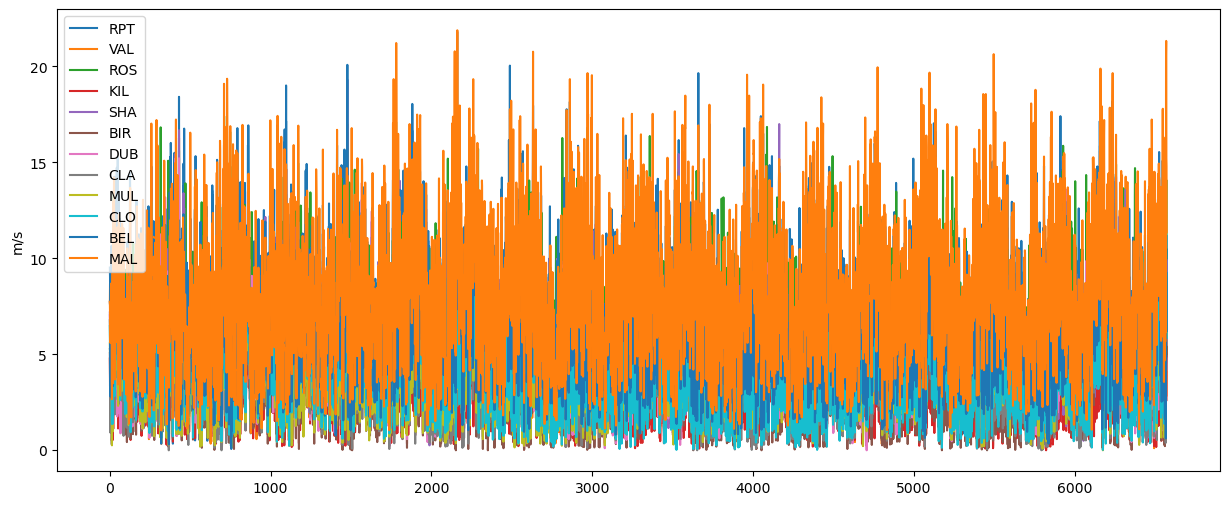

In [69]:
# make a general map 

# Importamos la funcionalidad de matplotlib, y el graficado inline
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
#plt.style.use('ggplot')

# Nueva figura
plt.figure(figsize=(15,6)) 

# Para cada serie un plot.
for idx,lname in enumerate(locations):
    plt.plot(wind_data[:,idx] * 0.514444, label=lname)   # a m/s 
    
plt.ylabel('m/s')    
plt.legend()    

#plt.show()

* Fecha de inicio de la serie y final: Crea un objeto de fecha y hora usando los datos de una matriz. Está usando la primera fila de la matriz para obtener el año, mes y día. El año se agrega al valor 1900 para obtener el año completo. Luego, los valores del mes y el día se convierten en enteros antes de pasarlos al constructor datetime. El resultado es un objeto datetime que representa la fecha especificada por los datos en la matriz.

* Fecha Final: Este código toma el último elemento de la matriz de datos (data_raw) en la primera y segunda columna, los convierte a enteros y luego agrega un día a la fecha resultante utilizando el módulo de tiempo delta de datetime. Esto significa que el código está agregando un día a la última fecha en la matriz de datos.

* mpl_dr = drange(startd, endd, dt.timedelta(days=1)) genera una secuencia de fechas entre dos fechas específicas (startd y endd). El parámetro dt.timedelta(days=1) indica que la secuencia se generará con un intervalo de un día entre cada fecha. Esto significa que el resultado será una lista de fechas que comienza con startd y termina con endd, con intervalos de un día entre cada fecha.

* idx,len: itera a través de una lista de ubicaciones (locations[:]) y usa la función enumerate para crear un índice (idx) para cada elemento en la lista. Luego, usa la función plt.plot_date para trazar los datos de viento (wind_data[:,idx] * 0.514444) en un gráfico con la etiqueta correspondiente a cada ubicación (lname).

1961-01-01 00:00:00 1979-01-01 00:00:00


Text(0.5, 1.0, 'Series completas')

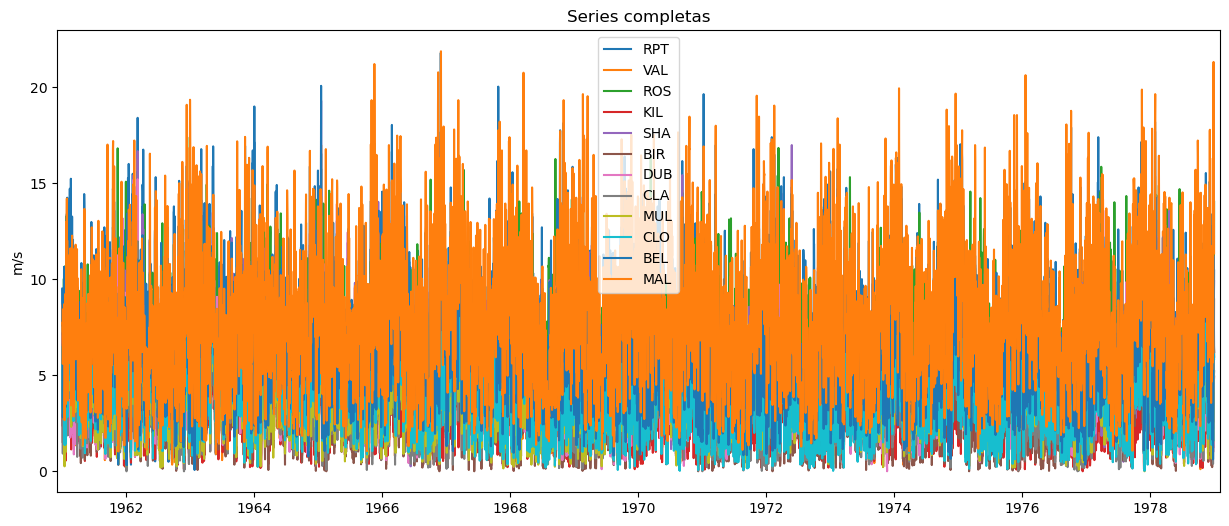

In [70]:
# import new mudlues to work with the time frame
# eje x con rango de fechas

from matplotlib.dates import drange   # Modulo rango fechas de matplotlib
import datetime as dt                 # objeto para manipular fechas de python

#here we calculated start and end data

# Fecha de inicio de la serie y final
startd = dt.datetime(1900 + int(data_raw[0,0]), 
                     int(data_raw[0,1]), 
                     int(data_raw[0,2]))        
# Fecha final
endd = dt.datetime(1900 + int(data_raw[-1,0]),
                   int(data_raw[-1,1]), 
                   int(data_raw[-1,2])) + dt.timedelta(days=1) 

# Rango de fechas en el formato de matplotlib   (start,end,step)
mpl_dr = drange(startd, endd, dt.timedelta(days=1) ) # do it in dayle step


print (startd, endd)


plt.figure(figsize=(15,6)) 

for idx,lname in enumerate(locations[:]):
    plt.plot_date(mpl_dr, wind_data[:,idx] * 0.514444, fmt='-', label=lname)
    
plt.xlim([startd-dt.timedelta(days=30), endd+dt.timedelta(days=30)])
plt.ylabel('m/s')    

plt.legend()  
plt.title("Series completas")


### Calculate some basic statistics


In [71]:
min_value = wind_data.min()
print(min_value)

0.0


In [72]:
max_value = wind_data.max()
print(max_value)

42.54


In [73]:
wind_data.mean()


10.22837377040868

In [74]:
wind_data.std()

5.603840181095793

### Generate statistics for one locaticon
use (axis=)

# the value for each of the 12 locations

In [75]:

# import numpy.ma as ma

In [76]:
# the same as bellow but just for 4  (first 4) regions
# create a boolean
# mask = [True, True,  True,  True, False, False, False, False, False, False, False, False]
# run the code with mask to just select some of the regions
# mx = wind_data[wind_data[mask]].std(axis=0)

# did not work, might be a bit more complicated than i thought



In [77]:
# Especificamos que haga la operacion pero sobre la primera 
# dimension, en este caso los renglones

# the value for each of the 12 locations
wdmax = wind_data.max(axis=0)
print(wdmax)

[35.8  33.37 33.84 28.46 37.54 26.16 30.37 31.08 25.88 28.21 42.38 42.54]


In [78]:
# lowest
wdmin = wind_data.min(axis=0)
wdmin

array([0.67, 0.21, 1.5 , 0.  , 0.13, 0.  , 0.  , 0.  , 0.  , 0.04, 0.13,
       0.67])

In [79]:
# mean
wdmean = wind_data.mean(axis=0)
wdmean

array([12.36371463, 10.64644813, 11.66010344,  6.30627472, 10.45688013,
        7.09225434,  9.7968345 ,  8.49442044,  8.49581838,  8.70726803,
       13.121007  , 15.59946152])

In [80]:
wdstd= wind_data.std(axis=0)
wdstd

array([5.61918301, 5.26820081, 5.00738377, 3.60513309, 4.93536333,
       3.96838126, 4.97689374, 4.49865783, 4.16746101, 4.50327222,
       5.83459319, 6.69734719])

## Graph data for each location

[ 1  2  3  4  5  6  7  8  9 10 11 12]


(0.0, 13.0)

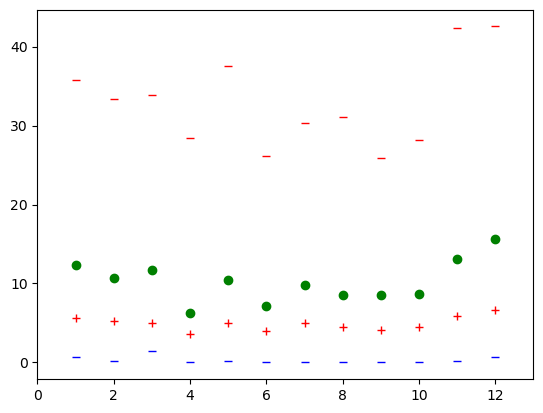

In [81]:
#first we make a matrix where we will fit all 
x = np.arange(1,13)
print(x)

plt.plot(x,wdmean,'og', x,wdmax,'_r' , x,wdmin,'_b' , x,wdstd ,'+r')
# Marcador og : circulo verde     ; _r Underscore red   ;  _b : Underscore blue

plt.xlim([0,13])

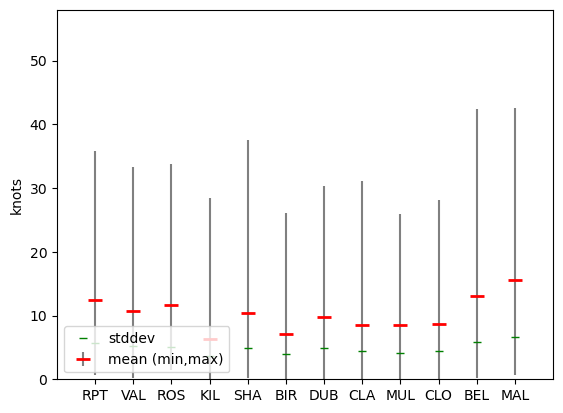

In [82]:
x = np.arange(1,13)

plt.xticks(x,locations)

plt.errorbar(x , wdmean, yerr=[ wdmean-wdmin, wdmax-wdmean ] , 
             fmt='_r' , ecolor='gray' , markeredgewidth=2 , markersize=10 , label='mean (min,max)' )

plt.plot(x,wdstd,'_g', label='stddev')

plt.ylim([0,58])
plt.xlim([0,13])

plt.ylabel('knots')
plt.legend(loc='lower left')

### Generar estadisticas de sobre todas las posiciones para cada dia.

In [83]:
# Las mismas operaciones, aplicando sobre la segunda dimension
wdpmin = wind_data.min(axis=1)
wdpmin.shape

(6574,)

In [84]:
wind_data.mean(axis=1)

array([13.09666667, 11.79833333, 11.34166667, ..., 14.89      ,
       15.3675    , 15.4025    ])

In [85]:
# Los valores maximos, sobre columnas
wind_data.max(axis=1)
# Los indices, que contienen los valores maximos 
wind_data.argmax(axis=1)

array([10, 10,  0, ..., 11, 11,  2])

### Obtener la fecha que tuvo la lectura maxima

In [86]:
# Diarios maximos para cada dia (sobre renglones) todas las posiciones
days_max = wind_data.max(axis=1)

# Indice del dia con valor maximo 
max_row = days_max.argmax()


In [87]:
# Fecha del dia con valor maximo
print ("19%d - %02d - %02d" %  
       ( int(data_raw[max_row, 0]) , int(data_raw[max_row, 1]) , int(data_raw[max_row, 2]) ) )
print ("Con valor maximo: %f" % days_max.max())

1966 - 12 - 02
Con valor maximo: 42.540000


### Estadisticas de mayo

In [88]:
may_indices = data_raw[:,1] == 5
may_indices.size

6574

In [89]:
may_data = wind_data[may_indices]
may_data.shape

(558, 12)

In [90]:
# Definir funcion para graficar una serie

def plotstats(serie, title):
    x = np.linspace(1,serie.shape[1],serie.shape[1])

    plt.xticks(x,locations)
    plt.errorbar(x , serie.mean(axis=0), 
                 yerr=[ serie.mean(axis=0)-serie.min(axis=0), serie.max(axis=0)-serie.mean(axis=0) ] , 
                 fmt='_r' , ecolor='gray' , markeredgewidth=2 , markersize=15 , label='mean (min,max)' )

    plt.plot(x,serie.std(axis=0),'_g', label='stddev')

    plt.ylim([0,58])
    plt.xlim([0,13])

    plt.title(title)
    plt.ylabel('knots')
    plt.legend(loc='upper right')    

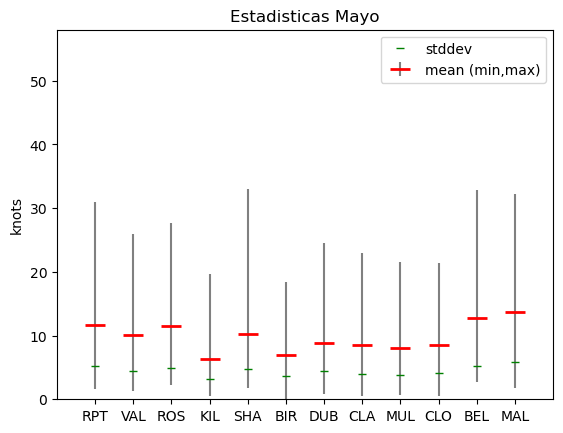

In [91]:
plotstats(may_data, 'Estadisticas Mayo')

### Estadisticas por mes

In [92]:
month_group = {'min' : np.zeros(12) , 'max' : np.zeros(12) , 
               'mean' : np.zeros(12), 'std' : np.zeros(12) } 

for m in range(12): 
    wind_data_bymonth = wind_data[data_raw[:,1] == (m+1)]
    month_group['min'][m] = wind_data_bymonth.min() 
    month_group['max'][m] = wind_data_bymonth.max() 
    month_group['mean'][m] = wind_data_bymonth.mean() 
    month_group['std'][m] = wind_data_bymonth.std()     


In [93]:
import datetime as dt
xticksmonths = [ dt.datetime(1900,m+1,1).strftime('%b') for m in range(12)]

xticksmonths

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

Text(0.5, 1.0, 'Estadisticas por mes')

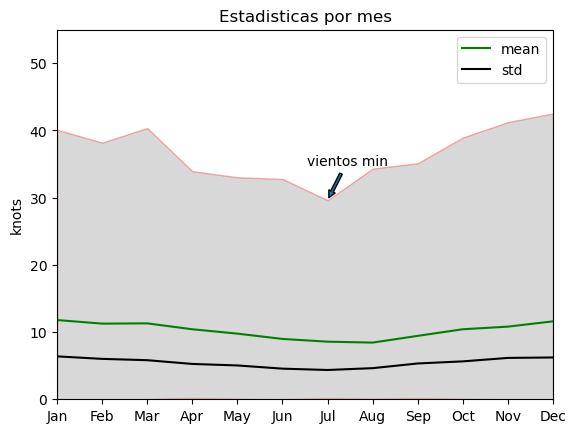

In [94]:
x = np.arange(12)

plt.plot(x, month_group['mean'] , '-g', label='mean' , )    
plt.fill_between(x , month_group['min'] , month_group['max'], color='gray', alpha=0.3, edgecolor='red') 

plt.plot(x, month_group['std'], '-k' ,label='std')  



plt.xticks(x,xticksmonths)
plt.ylabel('knots')
plt.legend()
plt.xlim([0,11])
plt.ylim([0,55])





# Anotacion
plt.annotate('vientos min' , xy=(month_group['max'].argmin(),month_group['max'].min()) , 
             arrowprops= dict(arrowstyle='simple') ,
             xytext=(-15, 25), textcoords='offset points',)




plt.title('Estadisticas por mes')

### Estadisticas por dia del año

Nueva columna yeardays, conteniendo en numero de dia del año que corresponde para cada observación

* Este código genera una matriz de números enteros de 1 a 365, que se repite el número de veces necesario para que la longitud de la matriz sea igual a la longitud de los datos crudos. Esta matriz se llama colyeardays y su forma es (longitud de los datos crudos,). Esto significa que hay un número entero para cada elemento en los datos crudos.

In [95]:

yd = np.arange(1,366)
colyeardays = np.tile(yd, int(np.ceil(len(data_raw)/365)))[0:len(data_raw)]
colyeardays.shape

(6574,)

# Creación de las matrcies y llenado de las mismas

1. Primero se crea cuatro matrices vacías de 365 elementos cada una. Estas matrices se utilizarán para almacenar los valores medios, máximos, mínimos y desviaciones estándar de datos diarios.

2. Está creando un bucle for que itera desde el número 1 hasta el número 366. Esto significa que el bucle se ejecutará 366 veces, con la variable d tomando los valores de 1 a 366. Esto es útil para realizar una tarea repetitiva para cada día del año.

3. Se calcula el promedio de los datos de viento para un día específico. dailywdt_mean[d-1] almacena el promedio de los datos de viento para el día especificado por la variable d. wind_data[np.where(colyeardays==d)] selecciona los datos de viento para el día especificado por la variable d y .mean() calcula el promedio de estos datos.

4. Se asigna el valor máximo de la matriz wind_data a la matriz dailywdt_max en la posición d-1. Esto se logra buscando el valor máximo de wind_data donde los elementos de colyeardays sean iguales a d.

5. Se busca el valor mínimo en la matriz wind_data para el día especificado por la variable d y lo almacena en la matriz dailywdt_min en la posición correspondiente al número de día.

6. Por ultimo se alcula la desviación estándar de los datos de viento para un día específico. El código toma el día especificado (d) y encuentra los datos de viento asociados con ese día en el conjunto de datos wind_data. Luego, calcula la desviación estándar de los datos y la almacena en el vector dailywdt_std en la posición d-1.



In [96]:
dailywdt_mean = np.empty(365)
dailywdt_max = np.empty(365)
dailywdt_min = np.empty(365)
dailywdt_std = np.empty(365)

for d in range(1,366):
    dailywdt_mean[d-1] = wind_data[np.where(colyeardays==d)].mean()
    dailywdt_max[d-1] = wind_data[np.where(colyeardays==d)].max()
    dailywdt_min[d-1] = wind_data[np.where(colyeardays==d)].min()
    dailywdt_std[d-1] = wind_data[np.where(colyeardays==d)].std()


# Estadistica para cada dia del año

1. Crea una figura de matplotlib con un tamaño de 15x6. Esto significa que la figura tendrá un ancho de 15 y un alto de 6. El objeto myfig se usa para guardar la figura creada. El objeto x es un arreglo de números enteros desde 0 hasta 364, que se usará para generar gráficos en la figura creada.

2. Usa la función de trazado de matplotlib para trazar una línea en un gráfico. La línea se traza usando los valores de x y dailywdt_mean, con un color verde (-g) y un ancho de línea (lw) de 2. La etiqueta 'yearday mean' se asigna a la línea para que aparezca en la leyenda del gráfico.

3. Usa la biblioteca de Python Matplotlib para crear un gráfico de líneas con dos conjuntos de datos. El primer conjunto de datos, x, se utiliza como los valores del eje x. El segundo conjunto de datos, dailywdt_min, se representa en el gráfico como una línea azul. El tercer conjunto de datos, dailywdt_max, se representa en el gráfico como una línea roja.

4. Este código usa la función plot de la biblioteca matplotlib para graficar los datos contenidos en las variables x e dailywdt_std. La línea se dibujará con un color negro ('-k') y tendrá la etiqueta 'desv.std.' para su identificación en la leyenda.

5. Este código usa la función fill_between de la biblioteca matplotlib para dibujar una línea de relleno entre dos líneas. Esta función toma como argumentos los valores x, dailywdt_min y dailywdt_max, que se usarán para trazar la línea de relleno. El argumento color especifica el color de la línea de relleno, mientras que el argumento alpha especifica el nivel de transparencia.

6. establece los límites del eje x en 0 y 365, agrega una leyenda a la gráfica y establece el título de la gráfica como "Estadística para cada día del año". Esto se usa para mostrar una gráfica con datos estadísticos para cada día del año.

Text(0.5, 1.0, 'Estadistica para cada dia del año')

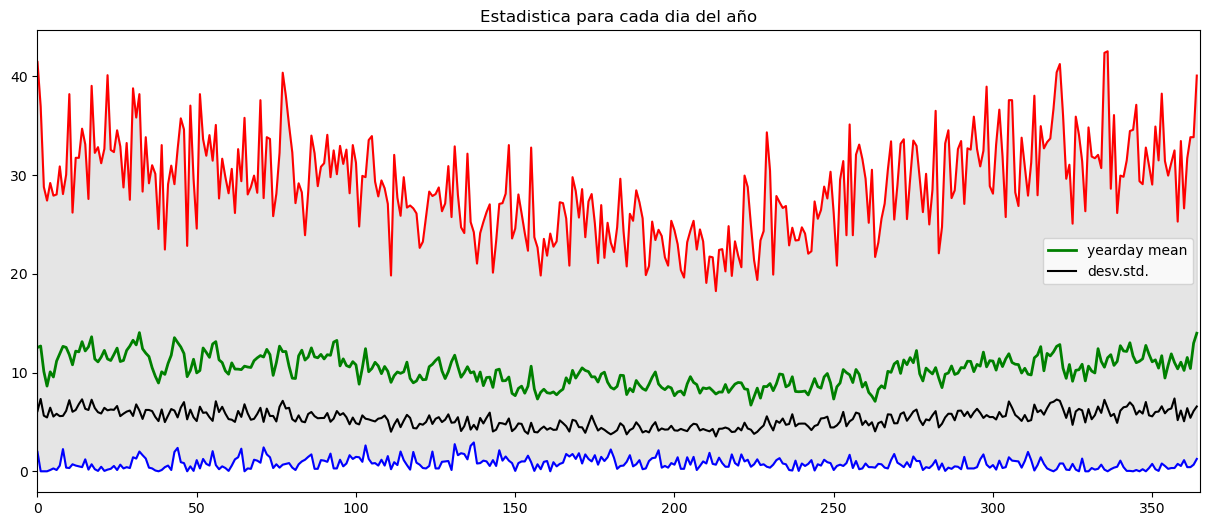

In [97]:
myfig = plt.figure(figsize=(15,6))    
x = np.arange(365)

plt.plot(x,dailywdt_mean,'-g',label='yearday mean', lw=2)
plt.plot(x,dailywdt_min, '-b')
plt.plot(x,dailywdt_max, '-r')
plt.plot(x,dailywdt_std, '-k',label='desv.std.')

plt.fill_between(x, dailywdt_min, dailywdt_max, color='gray', alpha=0.2)

plt.xlim([0,365])
plt.legend()
plt.title("Estadistica para cada dia del año")


# Curva que se ajusta alos puntos medios diarios

1. En primera instancia utiliza función de la biblioteca de Matplotlib en Python. Esta función se utiliza para crear una figura con un tamaño específico. En este caso, la figura tendrá un ancho de 15 y un alto de 6. Esto significa que la figura tendrá un aspecto rectangular con 15 unidades de ancho y 6 unidades de alto.

2. Despues usa la función polyfit de NumPy para ajustar un polinomio de grado 8 a un conjunto de datos. El primer argumento es una matriz de valores x (en este caso, los números del 0 al 364), el segundo argumento es una matriz de valores y (en este caso, los promedios diarios de temperatura) y el tercer argumento es el grado del polinomio. La función devuelve los coeficientes del polinomio como una matriz. La línea siguiente usa la función poly1d para crear un objeto que representa el polinomio con los coeficientes dados.

3. Continuando el código grafica dos líneas en un gráfico. La primera línea, "Curva de ajuste", se genera usando la función mfit para generar una curva de ajuste a partir de los datos en el intervalo np.arange (365). La segunda línea, "yearday mean", se genera utilizando los datos diarios promedio almacenados en dailywdt_mean y se grafica como puntos verdes.

4. Este código es una función de la biblioteca de Matplotlib llamada plt.annotate. Esta función se utiliza para agregar una anotación a un gráfico. En este caso, está agregando una anotación que dice "media mas baja" en el punto con la media más baja (especificado por los parámetros xy), con una flecha (especificada por el parámetro arrowprops) apuntando hacia el punto. El parámetro xytext especifica la posición del texto de la anotación y el parámetro textcoords especifica el sistema de coordenadas usado para ese texto.

5. Utiliza para crear una anotación en un gráfico. Esta anotación se usa para indicar la media más alta de los datos mostrados en el gráfico. La anotación consiste en una flecha que apunta a la media más alta, con un texto que dice "media mas alta" cerca de la flecha. El texto se ubica 15 puntos a la izquierda y 25 puntos hacia arriba del punto al que apunta la flecha.

6. Establece los límites de los ejes x e y en un gráfico. Establece el límite inferior del eje x en 0 y el límite superior en 365, y el límite inferior del eje y en 0 y el límite superior en 16. Esto significa que los datos mostrados en el gráfico no pueden exceder estos valores.

(0.0, 16.0)

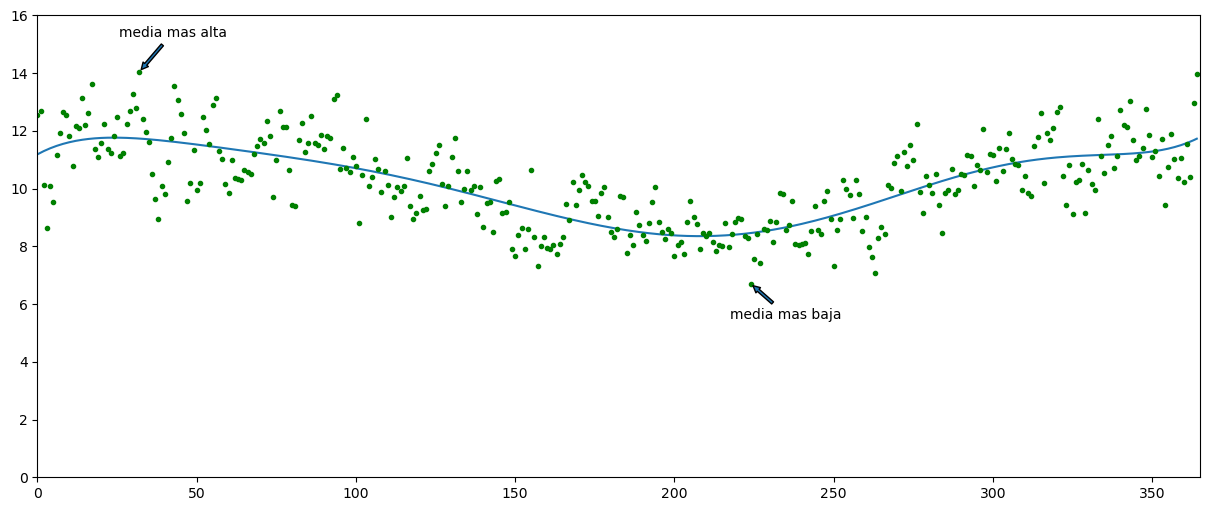

In [98]:

plt.figure(figsize=(15,6)) 

plys = np.polyfit(np.arange(365),dailywdt_mean,8)
mfit = np.poly1d(plys)


plt.plot(np.arange(365),mfit(np.arange(365)), label='Curva de ajuste')

plt.plot(dailywdt_mean,'.g',label='yearday mean')

# Anotaciones
plt.annotate('media mas baja' , xy=(dailywdt_mean.argmin(),dailywdt_mean.min()) , 
             arrowprops= dict(arrowstyle='simple') ,
             xytext=(-15, -25), textcoords='offset points',)

plt.annotate('media mas alta' , xy=(dailywdt_mean.argmax(),dailywdt_mean.max()) , 
             arrowprops= dict(arrowstyle='simple') ,
             xytext=(-15, 25), textcoords='offset points',)

plt.xlim([0,365])
plt.ylim([0,16])